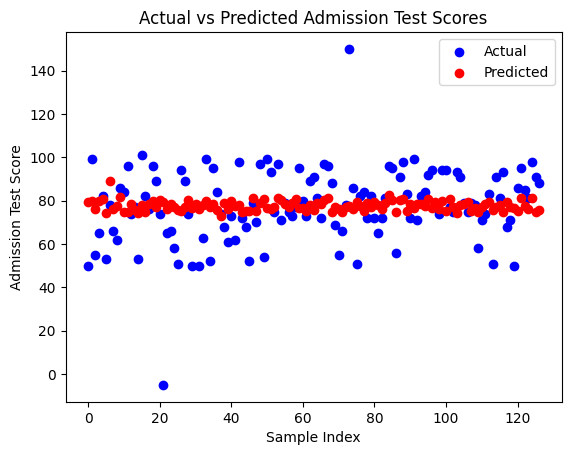

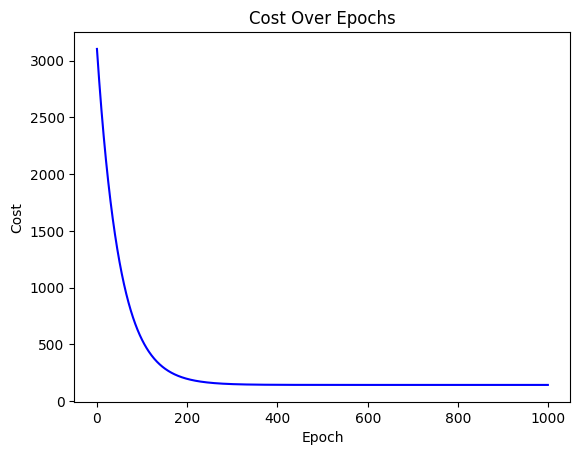

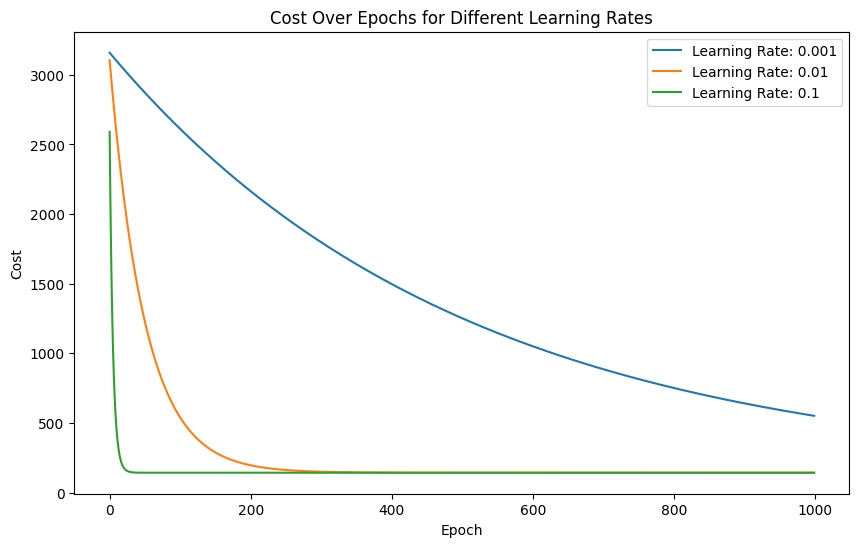

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error
import openpyxl

# Load the data from an Excel file
file_path = '/content/student_admission_record_dirty.xlsx'
data = pd.read_excel(file_path)

# Filter valid numerical data (ignoring any non-numeric or NaN values)
filtered_data = data[['Age', 'Admission Test Score', 'High School Percentage']].dropna()

# Extracting features (X) and target variable (y)
X = filtered_data[['Age', 'High School Percentage']].values
y = filtered_data['Admission Test Score'].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementing Multivariate Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

# Predictions using Linear Regression
y_pred = lin_reg.predict(X_scaled)

# Plotting Actual vs Predicted
plt.scatter(range(len(y)), y, color='blue', label='Actual')
plt.scatter(range(len(y)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Admission Test Scores')
plt.xlabel('Sample Index')
plt.ylabel('Admission Test Score')
plt.legend()
plt.show()

# Gradient Descent for Multivariate Linear Regression
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
m, n = X_scaled.shape
theta = np.zeros(n + 1)  # Initializing theta

# Adding bias term to X
X_bias = np.c_[np.ones(m), X_scaled]

def compute_cost(X, y, theta):
    return np.sum((X.dot(theta) - y) ** 2) / (2 * m)

def gradient_descent(X, y, theta, alpha, epochs):
    cost_history = []

    for epoch in range(epochs):
        theta -= alpha * (X.T.dot(X.dot(theta) - y)) / m
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Running gradient descent
theta, cost_history = gradient_descent(X_bias, y, theta, alpha, epochs)

# Plotting the cost over epochs
plt.plot(range(epochs), cost_history, color='blue')
plt.title('Cost Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Saving the cost history to Excel
cost_df = pd.DataFrame({
    'Epoch': range(epochs),
    'Cost': cost_history
})

# Experimenting with different hyperparameters (learning rates)
learning_rates = [0.001, 0.01, 0.1]
hyperparameter_results = {}

for lr in learning_rates:
    theta, cost_history = gradient_descent(X_bias, y, np.zeros(n + 1), lr, epochs)
    hyperparameter_results[lr] = cost_history

# Plotting cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, cost in hyperparameter_results.items():
    plt.plot(range(epochs), cost, label=f'Learning Rate: {lr}')
plt.title('Cost Over Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Saving the results back to Excel
results = pd.DataFrame({
    'Age': filtered_data['Age'],
    'High School Percentage': filtered_data['High School Percentage'],
    'Actual Admission Test Score': y,
    'Predicted Admission Test Score': y_pred
})

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Multivariate_Regression_Results', index=False)
    cost_df.to_excel(writer, sheet_name='Cost_History', index=False)

# Analysis of hyperparameters
hyperparam_df = pd.DataFrame(hyperparameter_results)
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    hyperparam_df.to_excel(writer, sheet_name='Hyperparameter_Analysis', index=False)
